<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-582102-1694708911/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [138]:
df=pd.read_csv("Titanic-Dataset.csv")

In [139]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
df.drop(["Name","Ticket","Cabin","PassengerId","Embarked"],axis=1,inplace=True)

In [141]:
df.dropna(inplace=True)

In [142]:
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

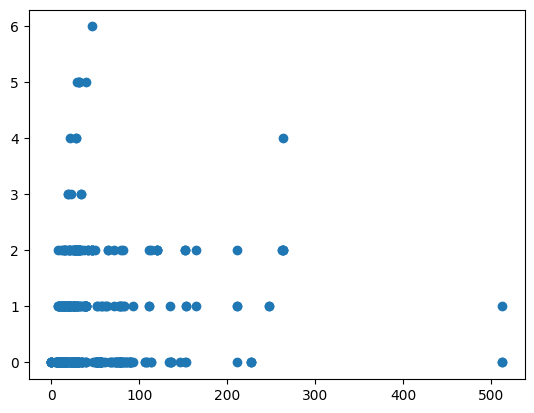

In [143]:
plt.scatter(df["Fare"],df["Parch"])

<ipython-input-145-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

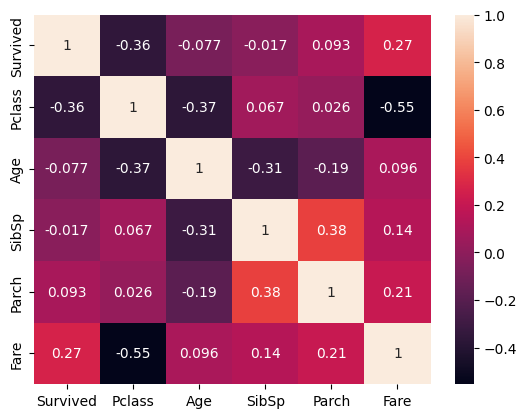

In [145]:
sns.heatmap(df.corr(),annot=True)

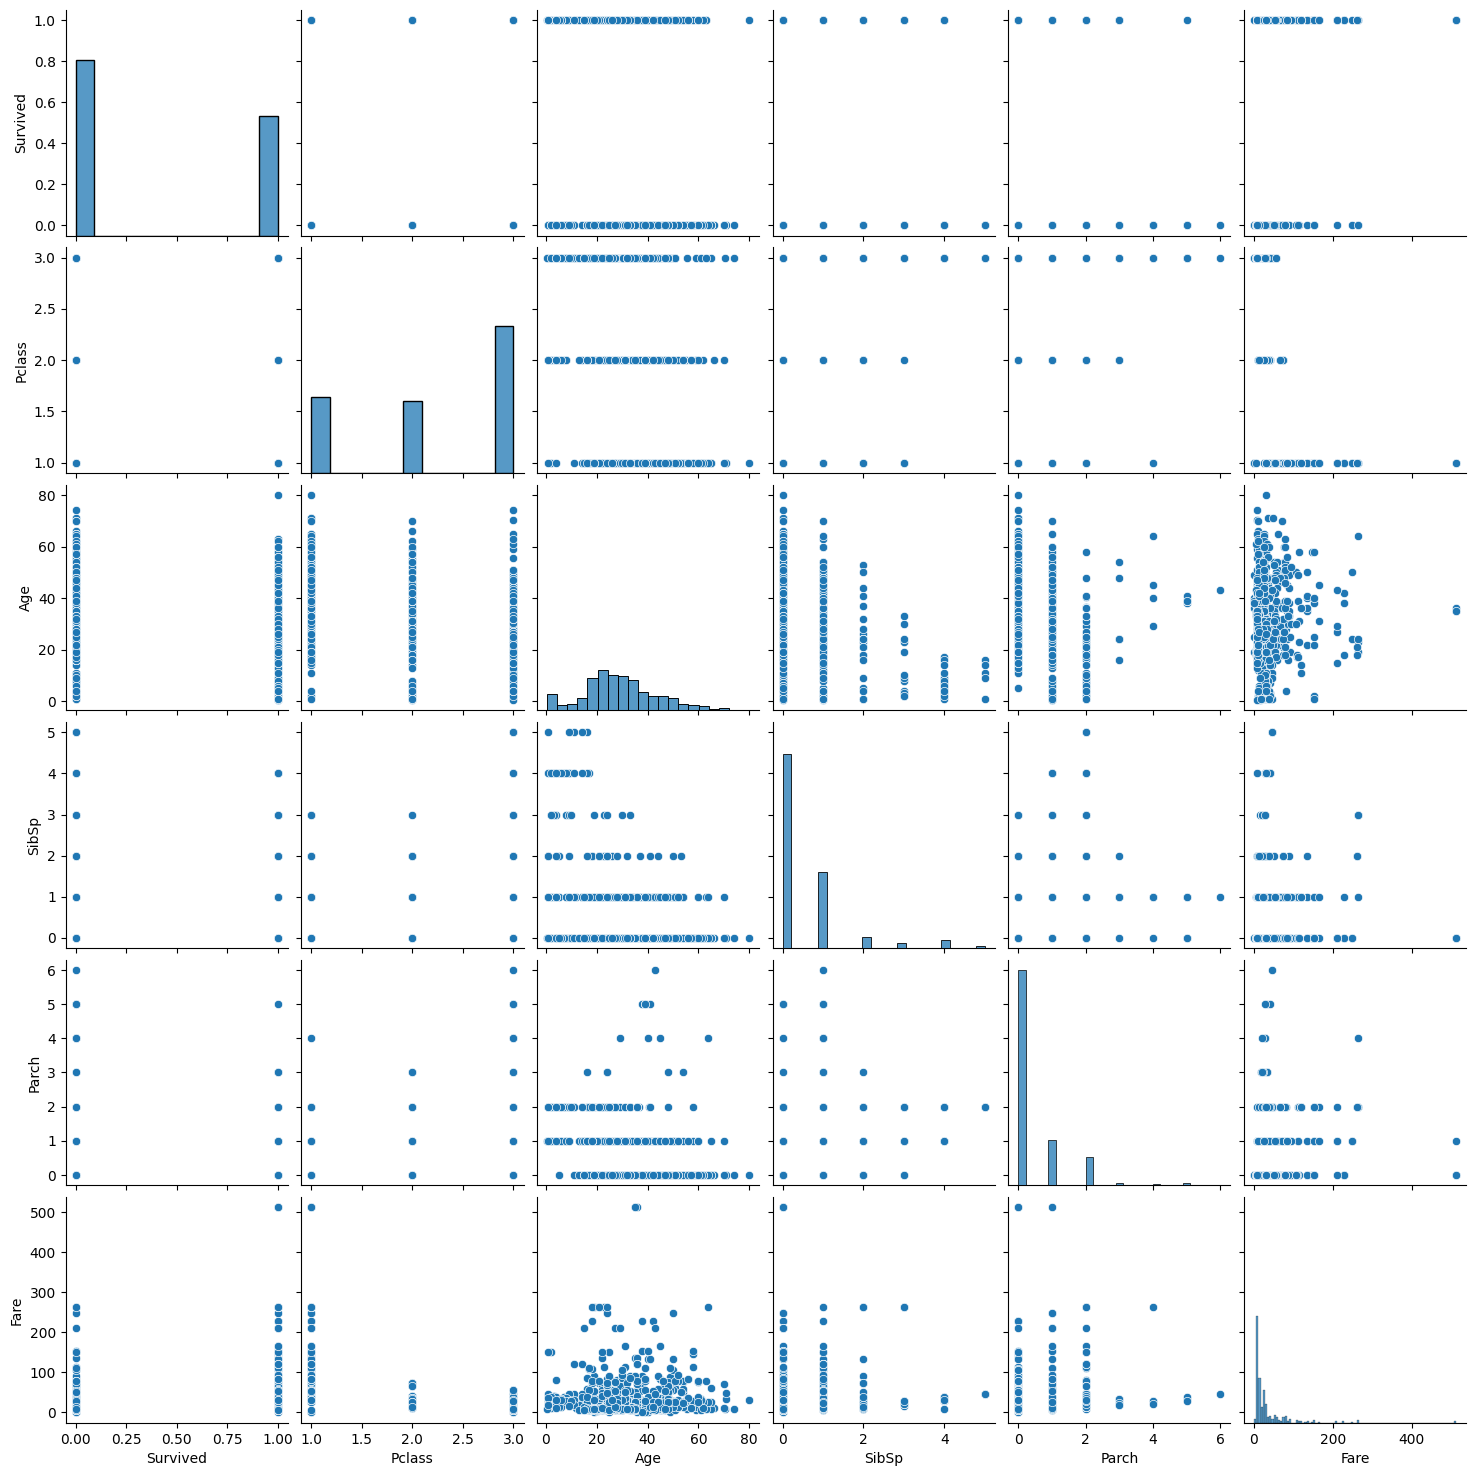

In [120]:
sns.pairplot(df)

<Axes: xlabel='Sex', ylabel='Survived'>

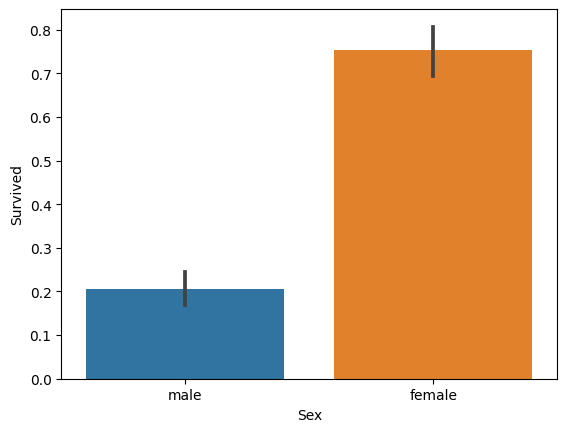

In [122]:
sns.barplot(x=df["Sex"],y=df["Survived"])

<Axes: >

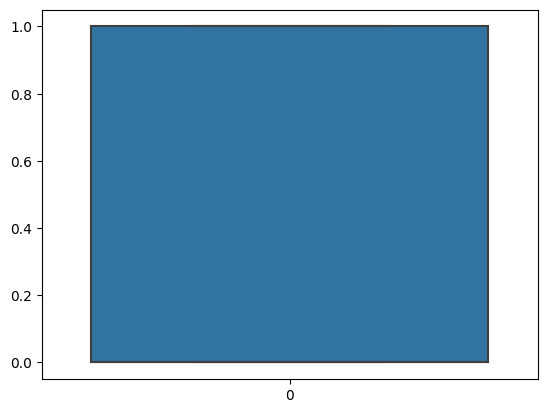

In [100]:
sns.boxplot(df.Survived)

<Axes: >

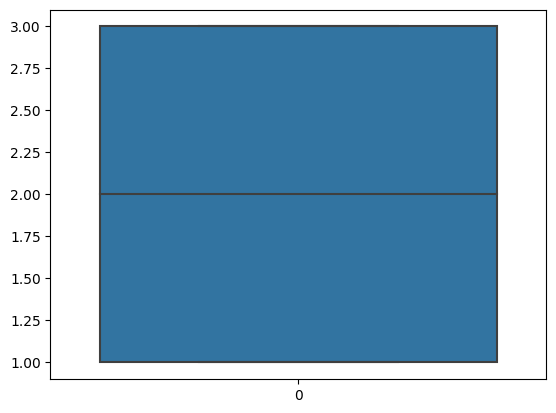

In [101]:
sns.boxplot(df.Pclass)

<Axes: >

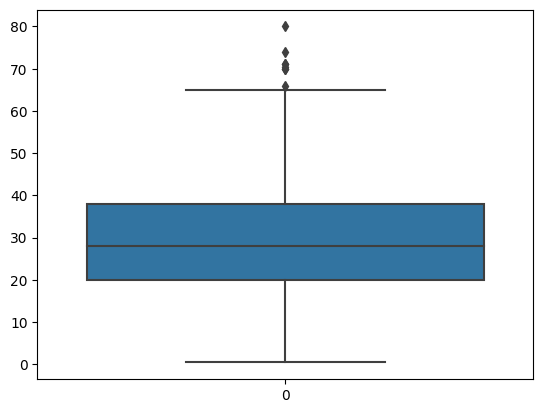

In [103]:
sns.boxplot(df.Age)

<Axes: >

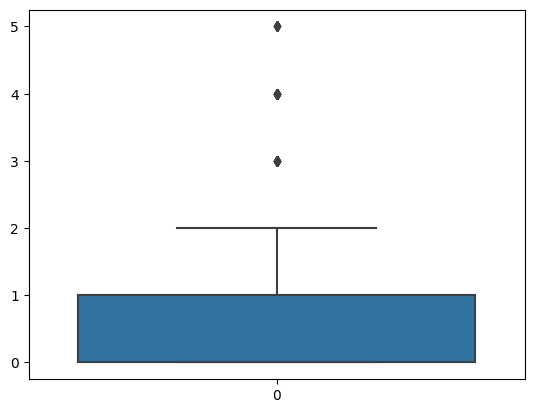

In [104]:
sns.boxplot(df.SibSp)

<Axes: >

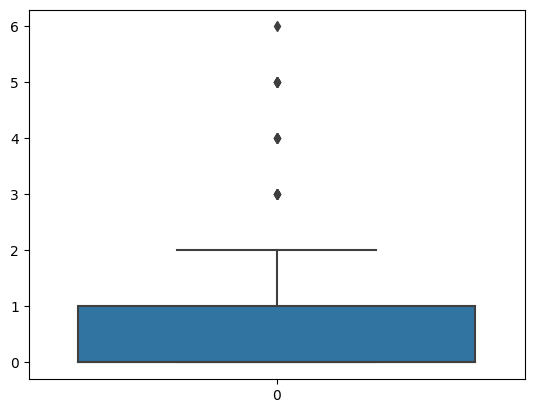

In [105]:
sns.boxplot(df.Parch)

<Axes: >

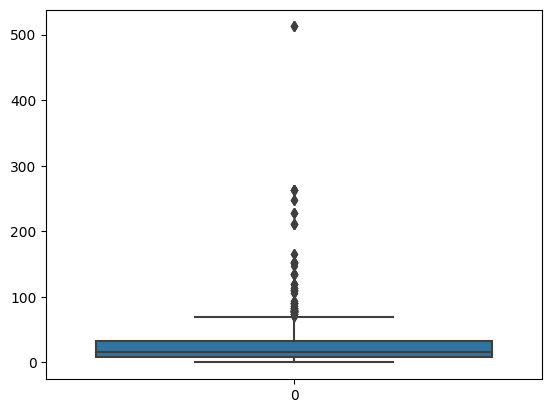

In [106]:
sns.boxplot(df.Fare)

In [146]:
X=df.drop(columns=["Survived"],axis=1)
X.head()

Pclass     Sex   Age  SibSp  Parch     Fare
0       3    male  22.0      1      0   7.2500
1       1  female  38.0      1      0  71.2833
2       3  female  26.0      0      0   7.9250
3       1  female  35.0      1      0  53.1000
4       3    male  35.0      0      0   8.0500

In [147]:
y=df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [148]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [149]:
X["Sex"]=le.fit_transform(X["Sex"])

In [150]:
X.head()

Pclass  Sex   Age  SibSp  Parch     Fare
0       3    1  22.0      1      0   7.2500
1       1    0  38.0      1      0  71.2833
2       3    0  26.0      0      0   7.9250
3       1    0  35.0      1      0  53.1000
4       3    1  35.0      0      0   8.0500

In [151]:
print(le.classes_)

['female' 'male']


In [152]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'female': 0, 'male': 1}

In [153]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [154]:
X_Scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [155]:
X_Scaled.head()

Pclass  Sex       Age  SibSp  Parch      Fare
0     1.0  1.0  0.271174    0.2    0.0  0.014151
1     0.0  0.0  0.472229    0.2    0.0  0.139136
2     1.0  0.0  0.321438    0.0    0.0  0.015469
3     0.0  0.0  0.434531    0.2    0.0  0.103644
4     1.0  1.0  0.434531    0.0    0.0  0.015713

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size =0.2,random_state =0)

In [157]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(571, 6) (143, 6) (571,) (143,)


In [158]:
from sklearn.linear_model import LinearRegression

In [160]:
lr=LinearRegression()

In [161]:
lr.fit(x_train,y_train)

LinearRegression()

In [163]:
y_pred=lr.predict(x_test)

In [164]:
y_pred

array([ 5.34637690e-01,  8.34306838e-01,  6.65221022e-01,  2.56136854e-01,
        5.07885058e-01,  1.88723046e-02,  2.32383387e-01,  2.90801079e-01,
        2.69837784e-01,  3.92333014e-01,  1.56184048e-01,  6.04404367e-01,
        7.42813022e-01,  6.18187241e-02,  2.82934614e-01,  6.15178835e-01,
        2.73990157e-01,  6.38932283e-01,  6.25623209e-01,  2.38032146e-01,
        1.67850299e-01,  7.04445351e-01,  8.07632508e-01,  5.00066475e-02,
        1.07728401e-01,  6.38932283e-01,  9.75694623e-01,  3.79078430e-01,
        4.50725506e-01,  4.57136007e-01,  9.56299439e-02,  4.30459205e-02,
        1.69001470e-01,  7.85091852e-01,  7.75252356e-02,  3.75255525e-02,
        8.66193101e-01,  4.45350570e-01,  1.68275941e-01,  6.11195264e-01,
        1.56953718e-01,  1.62188076e-01,  3.59582291e-01,  5.65409422e-01,
        1.19789385e-01,  7.34046110e-01,  3.48075291e-02,  2.34249911e-01,
        7.70356571e-02,  6.07234379e-02,  4.19323367e-01,  8.01356645e-01,
        3.22829528e-01,  

In [165]:
y_test

423    0
177    0
305    1
292    0
889    1
      ..
308    0
379    0
123    1
471    0
615    1
Name: Survived, Length: 143, dtype: int64

In [166]:
Survival=pd.DataFrame({"Actual_Survival":y_test,"Predicted _Survival":y_pred})

In [167]:
Survival

Actual_Survival  Predicted _Survival
423                0             0.534638
177                0             0.834307
305                1             0.665221
292                0             0.256137
889                1             0.507885
..               ...                  ...
308                0             0.235038
379                0             0.174291
123                1             0.749873
471                0             0.059679
615                1             0.769973

[143 rows x 2 columns]